#Imports

In [ ]:
!pip install tensorflow==2.12.0

In [ ]:
#imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load data
df = pd.read_csv('/content/drive/MyDrive/data_sets/compas-scores-two-years.csv')

In [ ]:
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


#EDA

In [ ]:
df.shape

(7214, 53)

In [ ]:
df.dtypes

,0
id,int64
name,object
first,object
last,object
compas_screening_date,object
sex,object
dob,object
age,int64
age_cat,object
race,object


In [ ]:
df.describe()

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid
count,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,6907.000000,7192.000000,7214.000000,2316.000000,0.0,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000
mean,5501.255753,34.817993,0.067230,4.509565,0.090934,0.109371,3.472415,3.304763,57.731368,0.481148,20.269430,NaN,0.113529,4.509565,3.691849,3.472415,11.465068,553.436651,0.382867,0.450652
std,3175.706870,11.888922,0.473972,2.856396,0.485239,0.501586,4.882538,75.809505,329.740215,0.499679,74.871668,NaN,0.317261,2.856396,2.510148,4.882538,46.954563,399.020583,0.486120,0.497593
min,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-414.000000,0.000000,0.000000,-1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2735.250000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,2.000000,1.000000,0.000000,0.000000,148.250000,0.000000,0.000000
50%,5509.500000,31.000000,0.000000,4.000000,0.000000,0.000000,2.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,4.000000,3.000000,2.000000,0.000000,530.500000,0.000000,0.000000
75%,8246.500000,42.000000,0.000000,7.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.000000,7.000000,5.000000,5.000000,1.000000,914.000000,1.000000,1.000000
max,11001.000000,96.000000,20.000000,10.000000,13.000000,17.000000,38.000000,1057.000000,9485.000000,1.000000,993.000000,NaN,1.000000,10.000000,10.000000,38.000000,937.000000,1186.000000,1.000000,1.000000


In [ ]:
df.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [ ]:
#Number of missing values in the df
df.isna().sum()

,0
id,0
name,0
first,0
last,0
compas_screening_date,0
sex,0
dob,0
age,0
age_cat,0
race,0


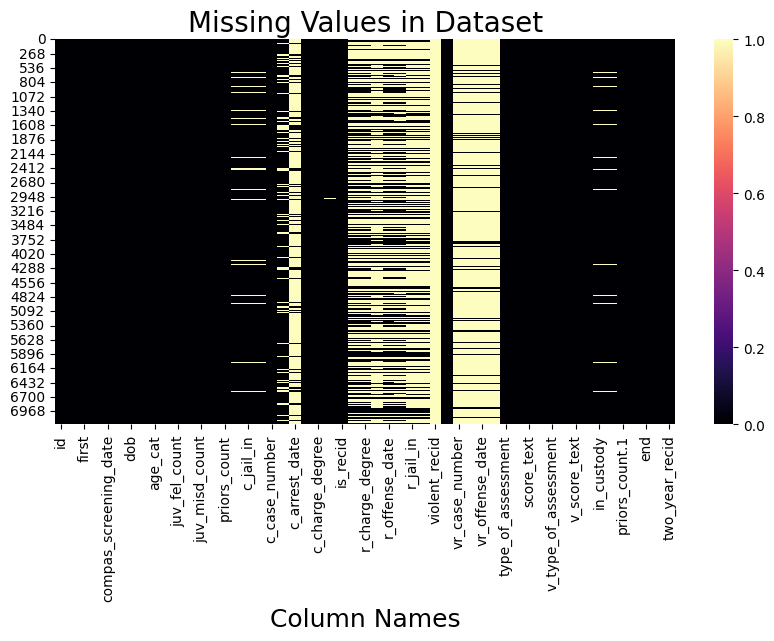

In [ ]:
#Heatmap displaying the missing values in the df
def heatmap_missing_values(data):
  plt.figure(figsize=(10,5))
  sns.heatmap(data.isnull(), cbar=True, cmap='magma')
  plt.xlabel("Column Names", size=18)
  plt.title('Missing Values in Dataset',fontsize=20)
  plt.show()

heatmap_missing_values(df)

In [ ]:
df['age_cat'].value_counts()

,count
age_cat,
25 - 45,4109
Greater than 45,1576
Less than 25,1529


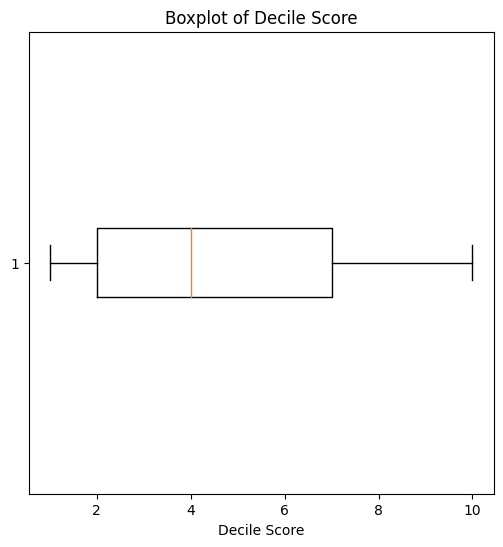

In [ ]:
plt.figure(figsize=(6, 6))
plt.boxplot(df['decile_score'], vert=False)
plt.title('Boxplot of Decile Score')
plt.xlabel('Decile Score')
plt.show()

In [ ]:
count = df['sex'].value_counts()
count

,count
sex,
Male,5819
Female,1395


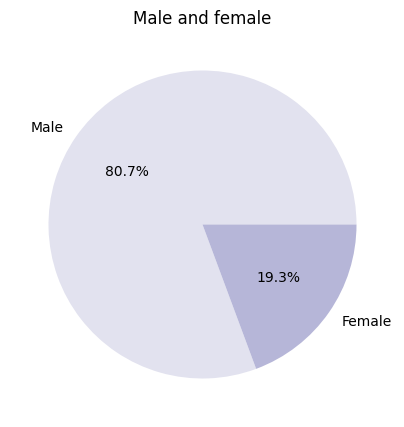

In [ ]:
plt.figure(figsize=(5, 5))

#Plotting the pie chart
colors = plt.cm.Purples(np.linspace(0.2, 1, 5))
plt.pie(count, labels=['Male', 'Female'], autopct='%1.1f%%', colors=colors, shadow=False)


plt.title('Male and female')
plt.show()

In [ ]:
race_count = df['race'].value_counts()
race_count

,count
race,
African-American,3696
Caucasian,2454
Hispanic,637
Other,377
Asian,32
Native American,18


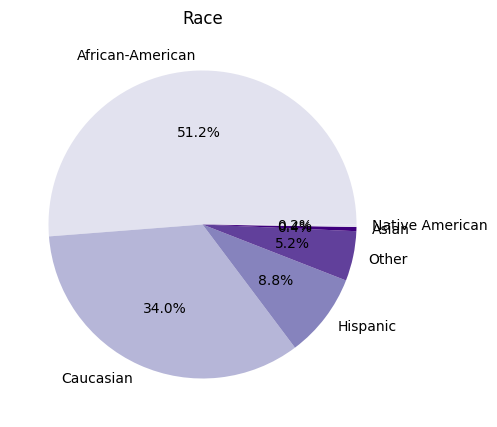

In [ ]:
plt.figure(figsize=(5, 5))

#Plotting the pie chart
colors = plt.cm.Purples(np.linspace(0.2, 1, 5))
plt.pie(race_count, labels=['African-American', 'Caucasian', 'Hispanic', 'Other', 'Asian', 'Native American'],
        autopct='%1.1f%%', colors=colors, shadow=False)


plt.title('Race')
plt.show()

In [ ]:
recid_count = df['two_year_recid'].value_counts()
recid_count

,count
two_year_recid,
0,3963
1,3251


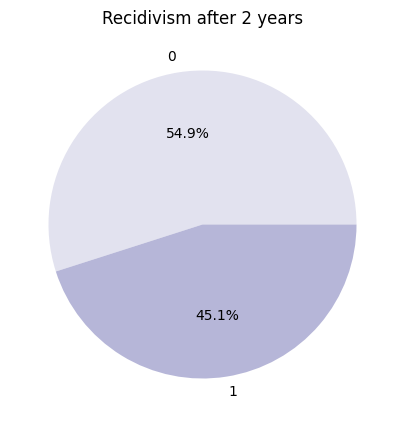

In [ ]:
plt.figure(figsize=(5, 5))

#Plotting the pie chart
colors = plt.cm.Purples(np.linspace(0.2, 1, 5))
plt.pie(recid_count, labels=['0', '1'],
        autopct='%1.1f%%', colors=colors, shadow=False)


plt.title('Recidivism after 2 years')
plt.show()

In [ ]:
charge_degree_count = df['c_charge_degree'].value_counts()
charge_degree_count

,count
c_charge_degree,
F,4666
M,2548


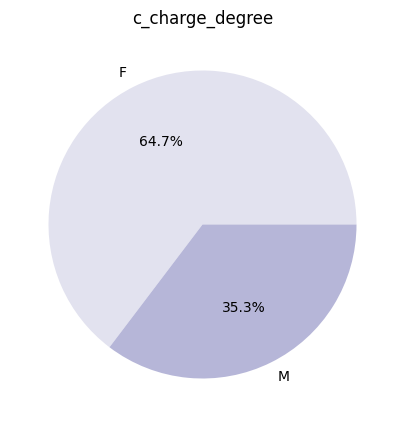

In [ ]:
plt.figure(figsize=(5, 5))


colors = plt.cm.Purples(np.linspace(0.2, 1, 5))
plt.pie(charge_degree_count, labels=['F', 'M'],
        autopct='%1.1f%%', colors=colors, shadow=False)


plt.title('c_charge_degree')
plt.show()

#Preprocessing

In [ ]:
df = df[(df["days_b_screening_arrest"] <= 30)
        & (df["days_b_screening_arrest"] >= -30)
        & (df["is_recid"] != -1)
        & (df["c_charge_degree"] != 'O')
        & (df["score_text"] != 'N/A')].reset_index(drop=True)

In [ ]:
cols_to_keep = ['sex','age_cat', 'race', 'juv_fel_count', 'decile_score','juv_misd_count',
                'juv_other_count', 'priors_count', 'days_b_screening_arrest','c_days_from_compas',
                'c_charge_degree', 'c_charge_desc', 'is_recid', 'two_year_recid']

df_1 = df[cols_to_keep]
df_1

,sex,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,two_year_recid
0,Male,Greater than 45,Other,0,1,0,0,0,-1.0,1.0,F,Aggravated Assault w/Firearm,0,0
1,Male,25 - 45,African-American,0,3,0,0,0,-1.0,1.0,F,Felony Battery w/Prior Convict,1,1
2,Male,Less than 25,African-American,0,4,0,1,4,-1.0,1.0,F,Possession of Cocaine,1,1
3,Male,25 - 45,Other,0,1,0,0,0,0.0,0.0,M,Battery,0,0
4,Male,25 - 45,Caucasian,0,6,0,0,14,-1.0,1.0,F,Possession Burglary Tools,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6167,Male,Less than 25,African-American,0,7,0,0,0,-1.0,1.0,F,Deliver Cannabis,0,0
6168,Male,Less than 25,African-American,0,3,0,0,0,-1.0,1.0,F,Leaving the Scene of Accident,0,0
6169,Male,Greater than 45,Other,0,1,0,0,0,-1.0,1.0,F,Aggravated Battery / Pregnant,0,0
6170,Female,25 - 45,African-American,0,2,0,0,3,-1.0,1.0,M,Battery on Law Enforc Officer,0,0


##Filtering race column

Keeping only African-American & Caucasian values from Race feature

In [ ]:
#Filter df to include only Caucasian and African American
df_1 = df_1[df_1['race'].isin(['Caucasian', 'African-American'])]
df_1

,sex,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,two_year_recid
1,Male,25 - 45,African-American,0,3,0,0,0,-1.0,1.0,F,Felony Battery w/Prior Convict,1,1
2,Male,Less than 25,African-American,0,4,0,1,4,-1.0,1.0,F,Possession of Cocaine,1,1
4,Male,25 - 45,Caucasian,0,6,0,0,14,-1.0,1.0,F,Possession Burglary Tools,1,1
6,Female,25 - 45,Caucasian,0,1,0,0,0,-1.0,1.0,M,Battery,0,0
7,Male,25 - 45,Caucasian,0,4,0,0,0,-1.0,1.0,F,"Poss 3,4 MDMA (Ecstasy)",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165,Male,25 - 45,African-American,0,2,0,0,0,-1.0,1.0,M,Possess Cannabis/20 Grams Or Less,1,1
6166,Male,Less than 25,African-American,0,9,0,0,0,-1.0,1.0,F,Possession of Cocaine,0,0
6167,Male,Less than 25,African-American,0,7,0,0,0,-1.0,1.0,F,Deliver Cannabis,0,0
6168,Male,Less than 25,African-American,0,3,0,0,0,-1.0,1.0,F,Leaving the Scene of Accident,0,0


In [ ]:
df_1['race'].unique()

array(['African-American', 'Caucasian'], dtype=object)

In [ ]:
df_1['c_charge_degree'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
df_1['c_charge_desc'].unique()

array(['Felony Battery w/Prior Convict', 'Possession of Cocaine',
       'Possession Burglary Tools', 'Battery', 'Poss 3,4 MDMA (Ecstasy)',
       'Poss3,4 Methylenedioxymethcath', 'arrest case no charge',
       'Felony Driving While Lic Suspd', 'Grand Theft in the 3rd Degree',
       'Driving While License Revoked', 'Possession Of Heroin',
       'Battery on Law Enforc Officer', 'Possession Of Methamphetamine',
       'Introduce Contraband Into Jail', 'Susp Drivers Lic 1st Offense',
       'Carrying Concealed Firearm', 'Pos Cannabis W/Intent Sel/Del',
       'Tampering With Physical Evidence',
       'Att Tamper w/Physical Evidence', 'Poss Wep Conv Felon',
       'Possess Cannabis/20 Grams Or Less',
       'Unlaw Use False Name/Identity', 'Viol Injunct Domestic Violence',
       'Defrauding Innkeeper $300/More', 'Uttering a Forged Instrument',
       'DUI Level 0.15 Or Minor In Veh', 'Possession of Oxycodone',
       'Attempt Armed Burglary Dwell', 'Poss Tetrahydrocannabinols',
     

##Encoding Categorical Features

Label Encoding 'age_cat'

In [ ]:
# Define a mapping dictionary
age_cat_mapping = {
    'Less than 25': 0,
    '25 - 45': 1,
    'Greater than 45': 2
}

# Apply the mapping to the column
df_1['age_cat_encoded'] = df_1['age_cat'].map(age_cat_mapping)

<ipython-input-28-8a1628c8091b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['age_cat_encoded'] = df_1['age_cat'].map(age_cat_mapping)


Label Encoding 'Sex' Feature

In [ ]:
#Function for label encoding
def label_encoding(data):
  label_encoder = LabelEncoder()
  data = label_encoder.fit_transform(data)
  print("Original Category -> Encoded Value:")
  for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category} -> {encoded_value}")
  return data

In [ ]:
#Label encoding sex
df_1['sex'] = label_encoding(df_1['sex'])

Original Category -> Encoded Value:
Female -> 0
Male -> 1


<ipython-input-30-2d0768d59646>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['sex'] = label_encoding(df_1['sex'])


In [ ]:
#Label encoding c_charge_degree column
df_1['c_charge_degree'] = label_encoding(df_1['c_charge_degree'])

Original Category -> Encoded Value:
F -> 0
M -> 1


<ipython-input-31-006044b33dfe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['c_charge_degree'] = label_encoding(df_1['c_charge_degree'])


In [ ]:
#Label encoding race column
df_1['race'] = label_encoding(df_1['race'])

Original Category -> Encoded Value:
African-American -> 0
Caucasian -> 1


<ipython-input-32-3653204ae962>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['race'] = label_encoding(df_1['race'])


In [ ]:
df_1.head()

,sex,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,two_year_recid,age_cat_encoded
1,1,25 - 45,0,0,3,0,0,0,-1.0,1.0,0,Felony Battery w/Prior Convict,1,1,1
2,1,Less than 25,0,0,4,0,1,4,-1.0,1.0,0,Possession of Cocaine,1,1,0
4,1,25 - 45,1,0,6,0,0,14,-1.0,1.0,0,Possession Burglary Tools,1,1,1
6,0,25 - 45,1,0,1,0,0,0,-1.0,1.0,1,Battery,0,0,1
7,1,25 - 45,1,0,4,0,0,0,-1.0,1.0,0,"Poss 3,4 MDMA (Ecstasy)",0,0,1


In [ ]:
df_1.drop(labels=['c_charge_desc'], axis=1, inplace=True)
df_1

<ipython-input-34-9347c1bd9f4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(labels=['c_charge_desc'], axis=1, inplace=True)


,sex,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,c_charge_degree,is_recid,two_year_recid,age_cat_encoded
1,1,25 - 45,0,0,3,0,0,0,-1.0,1.0,0,1,1,1
2,1,Less than 25,0,0,4,0,1,4,-1.0,1.0,0,1,1,0
4,1,25 - 45,1,0,6,0,0,14,-1.0,1.0,0,1,1,1
6,0,25 - 45,1,0,1,0,0,0,-1.0,1.0,1,0,0,1
7,1,25 - 45,1,0,4,0,0,0,-1.0,1.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165,1,25 - 45,0,0,2,0,0,0,-1.0,1.0,1,1,1,1
6166,1,Less than 25,0,0,9,0,0,0,-1.0,1.0,0,0,0,0
6167,1,Less than 25,0,0,7,0,0,0,-1.0,1.0,0,0,0,0
6168,1,Less than 25,0,0,3,0,0,0,-1.0,1.0,0,0,0,0


In [ ]:
df_1.drop(labels=['age_cat'], axis=1, inplace=True)
df_1

<ipython-input-35-09426e7cf26f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(labels=['age_cat'], axis=1, inplace=True)


,sex,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,c_charge_degree,is_recid,two_year_recid,age_cat_encoded
1,1,0,0,3,0,0,0,-1.0,1.0,0,1,1,1
2,1,0,0,4,0,1,4,-1.0,1.0,0,1,1,0
4,1,1,0,6,0,0,14,-1.0,1.0,0,1,1,1
6,0,1,0,1,0,0,0,-1.0,1.0,1,0,0,1
7,1,1,0,4,0,0,0,-1.0,1.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165,1,0,0,2,0,0,0,-1.0,1.0,1,1,1,1
6166,1,0,0,9,0,0,0,-1.0,1.0,0,0,0,0
6167,1,0,0,7,0,0,0,-1.0,1.0,0,0,0,0
6168,1,0,0,3,0,0,0,-1.0,1.0,0,0,0,0


<Axes: >

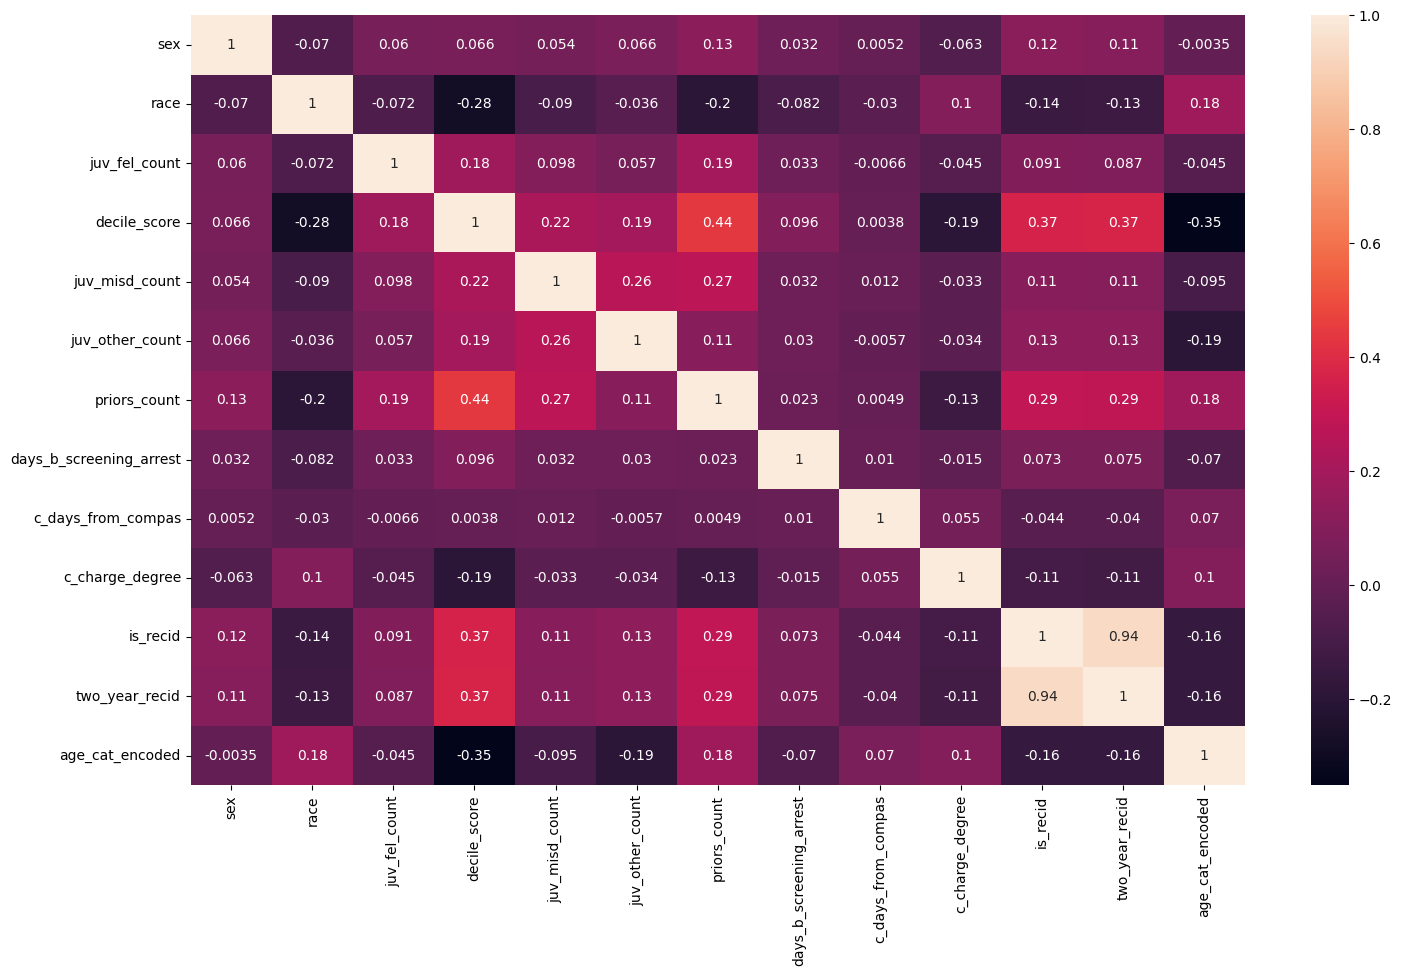

In [ ]:
df_corr = df_1.corr(method='pearson')
plt.figure(figsize = (17,10))
sns.heatmap(df_corr, annot=True) #visualising correlation between variables via heatmap

In [ ]:
#highly correlated - dropped
df_1.drop(labels=['is_recid'], axis=1, inplace=True)
df_1

<ipython-input-37-fefe163867a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(labels=['is_recid'], axis=1, inplace=True)


,sex,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,c_charge_degree,two_year_recid,age_cat_encoded
1,1,0,0,3,0,0,0,-1.0,1.0,0,1,1
2,1,0,0,4,0,1,4,-1.0,1.0,0,1,0
4,1,1,0,6,0,0,14,-1.0,1.0,0,1,1
6,0,1,0,1,0,0,0,-1.0,1.0,1,0,1
7,1,1,0,4,0,0,0,-1.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6165,1,0,0,2,0,0,0,-1.0,1.0,1,1,1
6166,1,0,0,9,0,0,0,-1.0,1.0,0,0,0
6167,1,0,0,7,0,0,0,-1.0,1.0,0,0,0
6168,1,0,0,3,0,0,0,-1.0,1.0,0,0,0


##Splitting

In [ ]:
#Separating features and target
X = df_1.drop(labels=['two_year_recid'], axis=1)
Y = df_1['two_year_recid']

#First split: 70% train, 30% temporary
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)

#Second split: 15% validation, 15% test
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

#Shape of each set
print(f"X_train\nShape: {X_train.shape}\n\nX_test\nShape: {X_test.shape}\n\nX_val\nShape: {X_val.shape}\n")
print(f"Y_train\nShape: {Y_train.shape}\n\nY_test\nShape: {Y_test.shape}\n\nY_val\nShape: {Y_val.shape}\n")

X_train
Shape: (3694, 11)

X_test
Shape: (792, 11)

X_val
Shape: (792, 11)

Y_train
Shape: (3694,)

Y_test
Shape: (792,)

Y_val
Shape: (792,)



##Feature Selection - Information gain

In [ ]:
#Information gain
from sklearn.feature_selection import mutual_info_classif


mi = mutual_info_classif(X, Y)

mi_scores = pd.DataFrame(mi, index=X.columns, columns=['MI Score'])

#Sort the features by their information gain
mi_scores = mi_scores.sort_values(by='MI Score', ascending=False)

print(mi_scores)

#Top features based on the information gain
top_features = mi_scores.head(5).index
print(f'Top 5 features: {top_features}')

                         MI Score
decile_score             0.070406
priors_count             0.045646
age_cat_encoded          0.017671
race                     0.010302
juv_fel_count            0.009632
juv_other_count          0.009533
juv_misd_count           0.009244
sex                      0.007815
c_charge_degree          0.006300
c_days_from_compas       0.003195
days_b_screening_arrest  0.001649
Top 5 features: Index(['decile_score', 'priors_count', 'age_cat_encoded', 'race',
       'juv_fel_count'],
      dtype='object')


<Figure size 1000x600 with 0 Axes>

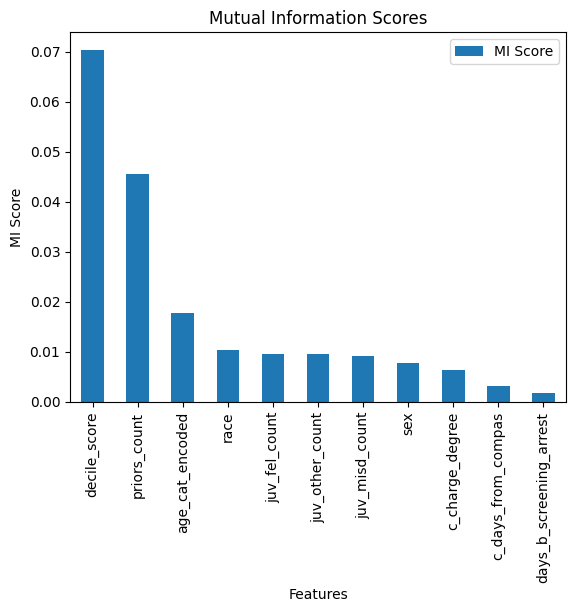

In [ ]:
#Plotting mutual information scores
plt.figure(figsize=(10, 6))
mi_scores.plot(kind='bar')
plt.title('Mutual Information Scores')
plt.ylabel('MI Score')
plt.xlabel('Features')
plt.show()

In [ ]:
#Dropping the least important features based on MI scores
cols_to_drop = ['c_days_from_compas', 'days_b_screening_arrest']

X_train.drop(columns=cols_to_drop, inplace=True)

X_test.drop(columns=cols_to_drop, inplace=True)

X_val.drop(columns=cols_to_drop, inplace=True)

#Model Development

##Decision Tree

In [ ]:
#Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dtree_clf = DecisionTreeClassifier(random_state=42) #Initialise a decision tree classifier

grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=10, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, Y_train)
best_dtree_clf = grid_search.best_estimator_ #Get the best estimator from the grid search

Fitting 10 folds for each of 72 candidates, totalling 720 fits


In [ ]:
print("Best Score: {:.4f}".format(grid_search.best_score_))

Best Score: 0.6630


In [ ]:
#Predicting on train
y_train_pred = best_dtree_clf.predict(X_train)
acc = accuracy_score(Y_train, y_train_pred)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
print(f"Train Accuracy: {acc}")

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Train Accuracy: 0.7303735787763942


In [ ]:
#Predicting on validation
y_val_pred = best_dtree_clf.predict(X_val)
acc = accuracy_score(Y_val, y_val_pred)

print(f"Val Accuracy: {acc}")

Val Accuracy: 0.6338383838383839


In [ ]:
print("Classification Report:")
cr = classification_report(y_val_pred, Y_val)
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.64      0.66       448
           1       0.57      0.63      0.60       344

    accuracy                           0.63       792
   macro avg       0.63      0.63      0.63       792
weighted avg       0.64      0.63      0.64       792



Confusion Matrix:
[[285 127]
 [163 217]]


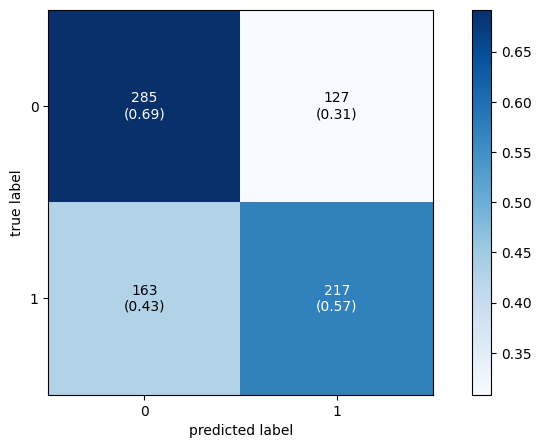

In [ ]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_val, y_val_pred)
print(cm)

fig, ax = plot_confusion_matrix(conf_mat=cm,figsize=(10, 5), show_absolute=True, show_normed=True, colorbar=True)
plt.show()

In [ ]:
#Predicting on test set
y_test_pred_dt = best_dtree_clf.predict(X_test)
acc = accuracy_score(Y_test, y_test_pred_dt)

print(f"Test Accuracy: {acc}")

Test Accuracy: 0.6565656565656566


In [ ]:
print("Classification Report:")
cr = classification_report(y_test_pred_dt, Y_test)
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       427
           1       0.63      0.61      0.62       365

    accuracy                           0.66       792
   macro avg       0.65      0.65      0.65       792
weighted avg       0.66      0.66      0.66       792



Confusion Matrix:
[[296 141]
 [131 224]]


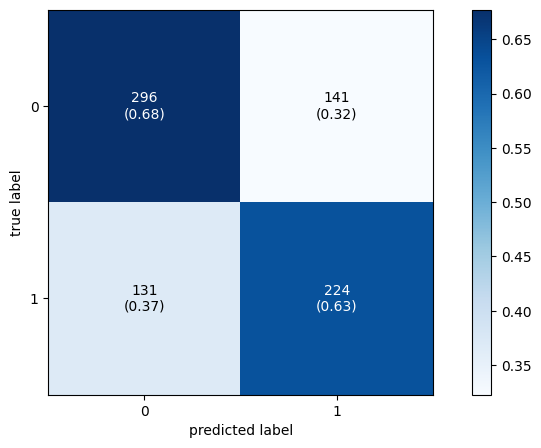

In [ ]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, y_test_pred_dt)
print(cm)

fig, ax = plot_confusion_matrix(conf_mat=cm,figsize=(10, 5), show_absolute=True, show_normed=True, colorbar=True)
plt.show()

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler

In [ ]:
#Scaling
#scaler = RobustScaler()
#scaler.fit(X_train)

#Transform
# X_train_scaled = scaler.transform(X_train)
# X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
#Define the model
lr_model = LogisticRegression(max_iter=1000)

#Parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  #Regularisation strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'newton-cholesky'],  #Solver
    'penalty': ['l2'],  #Regularization term, (L2 is compatabile with the solvers^)
}

In [ ]:
#Set up GridSearchCV
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=10, scoring='accuracy')

In [ ]:
#Fit the model
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear',
                                    'newton-cholesky']},
             scoring='accuracy')

In [ ]:
#CV score
best_score = grid_search.best_score_

print("Best Cross-Validation Score: ", best_score)

Best Cross-Validation Score:  0.6830030030030031


In [ ]:
#best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters found: ", best_params)

Best Parameters found:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
#Evaluate the model on validation set
y_val_pred = best_model.predict(X_val)
acc = accuracy_score(Y_val, y_val_pred)

print(f"Val Accuracy: {acc}")

Val Accuracy: 0.6565656565656566


In [ ]:
print("Classification Report:")
cr = classification_report(y_val_pred, Y_val)
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       492
           1       0.54      0.68      0.60       300

    accuracy                           0.66       792
   macro avg       0.65      0.66      0.65       792
weighted avg       0.68      0.66      0.66       792



Confusion Matrix:
[[316  96]
 [176 204]]


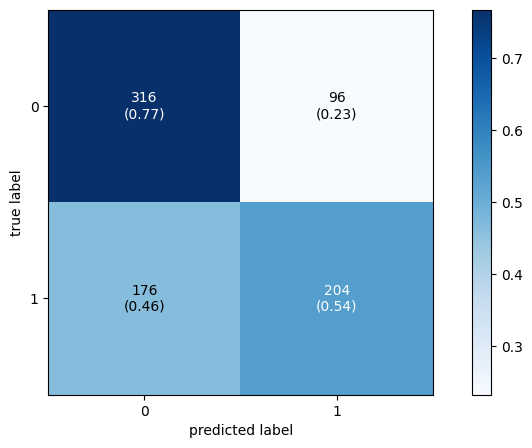

In [ ]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_val, y_val_pred)
print(cm)

fig, ax = plot_confusion_matrix(conf_mat=cm,figsize=(10, 5), show_absolute=True, show_normed=True, colorbar=True)
plt.show()

In [ ]:
#Evaluate the model - test set
y_pred_lr = best_model.predict(X_test)
acc = accuracy_score(Y_test, y_pred_lr)

print(f"Test Accuracy: {acc}")

Test Accuracy: 0.6893939393939394


In [ ]:
print("Classification Report:")
cr = classification_report(y_pred_lr, Y_test)
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       485
           1       0.59      0.68      0.63       307

    accuracy                           0.69       792
   macro avg       0.68      0.69      0.68       792
weighted avg       0.70      0.69      0.69       792



Confusion Matrix:
[[338  99]
 [147 208]]


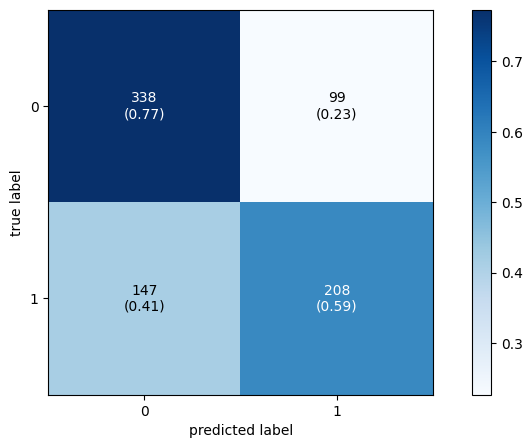

In [ ]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, y_pred_lr)
print(cm)

fig, ax = plot_confusion_matrix(conf_mat=cm,figsize=(10, 5), show_absolute=True, show_normed=True, colorbar=True)
plt.show()

##Neural Network

In [ ]:
!pip install keras==2.12.0

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop, Nadam

In [ ]:
# Define the function to create the DL model
def initial_model(optimizer='adam', activation='relu', learning_rate=0.001):
    if optimizer == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'nadam':
        optimizer = Nadam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(23, activation=activation, input_dim=X_train.shape[1]))
    model.add(tf.keras.layers.Dense(16, activation=activation))
    model.add(tf.keras.layers.Dense(8, activation=activation))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    return model


In [ ]:
#Creating the KerasClassifier model
model = KerasClassifier(build_fn=initial_model, verbose=1)

<ipython-input-67-1ba453d55bbe>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=initial_model, verbose=1)


In [ ]:
#Defining the hyperparameters and their ranges to search
param_grid = {
    'optimizer': ['adam', 'rmsprop', 'nadam'],
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128],
    'epochs': [10, 12, 15]
}

In [ ]:
#Perform grid search with cross-validation with 10 folds
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)
grid_result = grid.fit(X_train, Y_train)

Streaming output truncated to the last 5000 lines.
6/6 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7100 - precision_364: 0.7273 - recall_364: 0.5432
Epoch 1/12
52/52 [==============================] - 1s 2ms/step - loss: 0.6351 - accuracy: 0.6568 - precision_365: 0.6372 - recall_365: 0.6376
Epoch 2/12
52/52 [==============================] - 0s 2ms/step - loss: 0.6060 - accuracy: 0.6770 - precision_365: 0.6555 - recall_365: 0.6688
Epoch 3/12
52/52 [==============================] - 0s 2ms/step - loss: 0.6010 - accuracy: 0.6809 - precision_365: 0.6680 - recall_365: 0.6472
Epoch 4/12
52/52 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.6794 - precision_365: 0.6585 - recall_365: 0.6694
Epoch 5/12
52/52 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.6830 - precision_365: 0.6660 - recall_365: 0.6618
Epoch 6/12
52/52 [==============================] - 0s 2ms/step - loss: 0.5932 - accuracy: 0.6875 - prec

3/3 [==============================] - 0s 5ms/step - loss: 0.5922 - accuracy: 0.6892 - precision_543: 0.6821 - recall_543: 0.6629
Epoch 1/10
26/26 [==============================] - 1s 2ms/step - loss: 0.6688 - accuracy: 0.5546 - precision_544: 0.5192 - recall_544: 0.8972
Epoch 2/10
26/26 [==============================] - 0s 2ms/step - loss: 0.6384 - accuracy: 0.6472 - precision_544: 0.5992 - recall_544: 0.7863
Epoch 3/10
26/26 [==============================] - 0s 2ms/step - loss: 0.6179 - accuracy: 0.6728 - precision_544: 0.6370 - recall_544: 0.7301
Epoch 4/10
26/26 [==============================] - 0s 2ms/step - loss: 0.6045 - accuracy: 0.6806 - precision_544: 0.6556 - recall_544: 0.6961
Epoch 5/10
26/26 [==============================] - 0s 2ms/step - loss: 0.5999 - accuracy: 0.6809 - precision_544: 0.6636 - recall_544: 0.6715
Epoch 6/10
26/26 [==============================] - 0s 2ms/step - loss: 0.5972 - accuracy: 0.6812 - precision_544: 0.6654 - recall_544: 0.6671
Epoch 7/10
2

Streaming output truncated to the last 5000 lines.
26/26 [==============================] - 0s 2ms/step - loss: 0.5897 - accuracy: 0.6946 - precision_1442: 0.6857 - recall_1442: 0.6565
Epoch 9/12
26/26 [==============================] - 0s 2ms/step - loss: 0.5888 - accuracy: 0.6946 - precision_1442: 0.6821 - recall_1442: 0.6660
Epoch 10/12
26/26 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.6965 - precision_1442: 0.6833 - recall_1442: 0.6698
Epoch 11/12
26/26 [==============================] - 0s 2ms/step - loss: 0.5871 - accuracy: 0.6946 - precision_1442: 0.6862 - recall_1442: 0.6552
Epoch 12/12
3/3 [==============================] - 0s 4ms/step - loss: 0.6113 - accuracy: 0.6703 - precision_1442: 0.6624 - recall_1442: 0.6012
Epoch 1/12
26/26 [==============================] - 1s 2ms/step - loss: 0.6551 - accuracy: 0.6255 - precision_1443: 0.5984 - recall_1443: 0.6293
Epoch 2/12
26/26 [==============================] - 0s 2ms/step - loss: 0.6128 - accuracy

In [ ]:
print("Best Parameters: ", grid_result.best_params_)
print("Best Score: {:.4f}".format(grid_result.best_score_))

Best Parameters:  {'activation': 'relu', 'batch_size': 32, 'epochs': 12, 'learning_rate': 0.001, 'optimizer': 'adam'}
Best Score: 0.6919


In [ ]:
best_nn_model = grid_result.best_estimator_ #best estimator from the grid search

In [ ]:
#Train the model with the best hyperparameters from the Grid search
history = best_nn_model.fit(X_train, Y_train, validation_data=(X_val, Y_val))

Epoch 1/12
116/116 [==============================] - 1s 4ms/step - loss: 0.6326 - accuracy: 0.6429 - precision_1621: 0.6093 - recall_1621: 0.6842 - val_loss: 0.6404 - val_accuracy: 0.6275 - val_precision_1621: 0.6065 - val_recall_1621: 0.6368
Epoch 2/12
116/116 [==============================] - 0s 2ms/step - loss: 0.6004 - accuracy: 0.6860 - precision_1621: 0.6642 - recall_1621: 0.6802 - val_loss: 0.6383 - val_accuracy: 0.6364 - val_precision_1621: 0.6278 - val_recall_1621: 0.5947
Epoch 3/12
116/116 [==============================] - 0s 2ms/step - loss: 0.5968 - accuracy: 0.6862 - precision_1621: 0.6678 - recall_1621: 0.6705 - val_loss: 0.6364 - val_accuracy: 0.6389 - val_precision_1621: 0.6263 - val_recall_1621: 0.6132
Epoch 4/12
116/116 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.6862 - precision_1621: 0.6758 - recall_1621: 0.6476 - val_loss: 0.6366 - val_accuracy: 0.6477 - val_precision_1621: 0.6526 - val_recall_1621: 0.5684
Epoch 5/12
116/116 [====

In [ ]:
#Evaluating on validation
#results_val = best_nn_model.evaluate(X_val, Y_val)

In [ ]:
#Predicting on validation
y_val_pred_nn = best_nn_model.predict(X_val)
acc = accuracy_score(Y_val, y_val_pred_nn)

print(f"Val Accuracy: {acc}")

25/25 [==============================] - 0s 1ms/step
Val Accuracy: 0.648989898989899


In [ ]:
print("Classification Report:")
cr_nn = classification_report(y_val_pred_nn, Y_val)
print(cr_nn)

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       438
           1       0.60      0.64      0.62       354

    accuracy                           0.65       792
   macro avg       0.65      0.65      0.65       792
weighted avg       0.65      0.65      0.65       792



Confusion Matrix:
[[286 126]
 [152 228]]


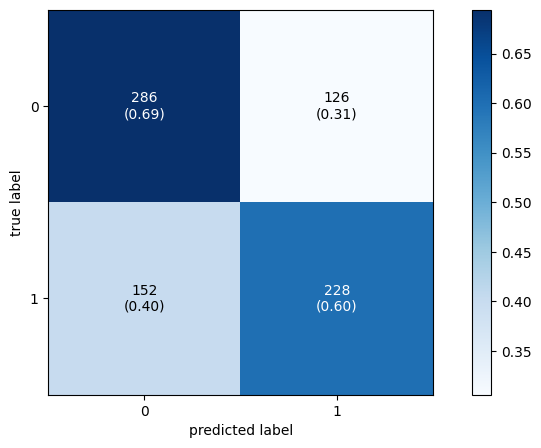

In [ ]:
print("Confusion Matrix:")
cm_nn = confusion_matrix(Y_val, y_val_pred_nn)
print(cm_nn)

fig, ax = plot_confusion_matrix(conf_mat=cm_nn,figsize=(10, 5), show_absolute=True, show_normed=True, colorbar=True)
plt.show()

In [ ]:
#Predicting on test set
y_test_pred_nn = best_nn_model.predict(X_test)
acc = accuracy_score(Y_test, y_test_pred_nn)

print(f"Test Accuracy: {acc}")

25/25 [==============================] - 0s 1ms/step
Test Accuracy: 0.6805555555555556


In [ ]:
print("Classification Report:")
cr_nn = classification_report(y_test_pred_nn, Y_test)
print(cr_nn)

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       426
           1       0.66      0.64      0.65       366

    accuracy                           0.68       792
   macro avg       0.68      0.68      0.68       792
weighted avg       0.68      0.68      0.68       792



Confusion Matrix:
[[305 132]
 [121 234]]


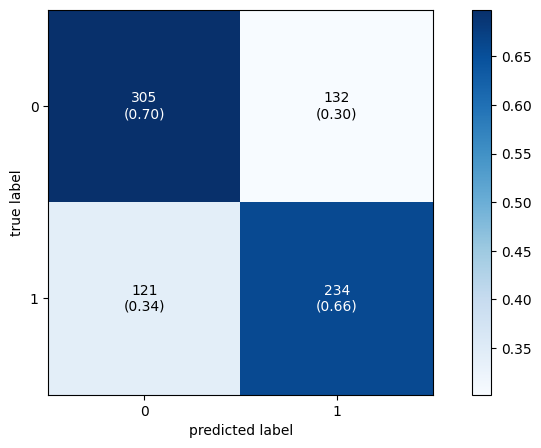

In [ ]:
print("Confusion Matrix:")
cm_nn = confusion_matrix(Y_test, y_test_pred_nn)
print(cm_nn)

fig, ax = plot_confusion_matrix(conf_mat=cm_nn,figsize=(10, 5), show_absolute=True, show_normed=True, colorbar=True)
plt.show()

#Fairness Metrics

In [ ]:
#Sensitive Features
race = X_test['race'].values
sex = X_test['sex'].values

In [ ]:
#Demographic Parity Difference
def demographic_parity_difference(y_pred, sensitive_feature):
    dp_group_0 = np.mean(y_pred[sensitive_feature == 0])
    dp_group_1 = np.mean(y_pred[sensitive_feature == 1])
    dp_difference = abs(dp_group_0 - dp_group_1)
    return dp_group_0, dp_group_1, dp_difference

#Equalized Odds Difference
def equalized_odds_difference(y_pred, y_true, sensitive_feature):
    tpr_group_0 = np.mean(y_pred[(y_true == 1) & (sensitive_feature == 0)])
    tpr_group_1 = np.mean(y_pred[(y_true == 1) & (sensitive_feature == 1)])
    fpr_group_0 = np.mean(y_pred[(y_true == 0) & (sensitive_feature == 0)])
    fpr_group_1 = np.mean(y_pred[(y_true == 0) & (sensitive_feature == 1)])

    tpr_difference = abs(tpr_group_0 - tpr_group_1)
    fpr_difference = abs(fpr_group_0 - fpr_group_1)

    return (tpr_group_0, tpr_group_1, tpr_difference), (fpr_group_0, fpr_group_1, fpr_difference)

#Predictive Parity Difference
def predictive_parity_difference(y_pred, y_true, sensitive_feature):
    precision_group_0 = np.sum((y_pred == 1) & (y_true == 1) & (sensitive_feature == 0)) / np.sum((y_pred == 1) & (sensitive_feature == 0))
    precision_group_1 = np.sum((y_pred == 1) & (y_true == 1) & (sensitive_feature == 1)) / np.sum((y_pred == 1) & (sensitive_feature == 1))

    precision_difference = abs(precision_group_0 - precision_group_1)

    return precision_group_0, precision_group_1, precision_difference

###DT Model Fairness Metrics

In [ ]:
#Fairness metrics for race - DT model
dp_race_0, dp_race_1, dp_diff_race = demographic_parity_difference(y_test_pred_dt, race)
(tpr_race_0, tpr_race_1, tpr_diff_race), (fpr_race_0, fpr_race_1, fpr_diff_race) = equalized_odds_difference(y_test_pred_dt, Y_test, race)
pp_race_0, pp_race_1, pp_diff_race = predictive_parity_difference(y_test_pred_dt, Y_test, race)

print(f"Demographic Parity (Race): Group 0 (African-American): {dp_race_0}, Group 1 (Caucasian): {dp_race_1}, Difference: {dp_diff_race}")
print(f"Equalized Odds (Race): TPR 0: {tpr_race_0}, TPR 1: {tpr_race_1}, TPR Difference: {tpr_diff_race}")
print(f"Equalized Odds (Race): FPR 0: {fpr_race_0}, FPR 1: {fpr_race_1}, FPR Difference: {fpr_diff_race}")
print(f"Predictive Parity (Race): Group 0 (African-American): {pp_race_0}, Group 1 (Caucasian): {pp_race_1}, Difference: {pp_diff_race}")

Demographic Parity (Race): Group 0 (African-American): 0.5726315789473684, Group 1 (Caucasian): 0.29337539432176657, Difference: 0.2792561846256018
Equalized Odds (Race): TPR 0: 0.7219917012448133, TPR 1: 0.43859649122807015, TPR Difference: 0.2833952100167431
Equalized Odds (Race): FPR 0: 0.4188034188034188, FPR 1: 0.21182266009852216, FPR Difference: 0.20698075870489666
Predictive Parity (Race): Group 0 (African-American): 0.6397058823529411, Group 1 (Caucasian): 0.5376344086021505, Difference: 0.10207147375079062


In [ ]:
#Fairness metrics for sex - DT Model
dp_sex_0, dp_sex_1, dp_diff_sex = demographic_parity_difference(y_test_pred_dt, sex)
(tpr_sex_0, tpr_sex_1, tpr_diff_sex), (fpr_sex_0, fpr_sex_1, fpr_diff_sex) = equalized_odds_difference(y_test_pred_dt, Y_test, sex)
pp_sex_0, pp_sex_1, pp_diff_sex = predictive_parity_difference(y_test_pred_dt, Y_test, sex)

print(f"Demographic Parity (Sex): Group 0 (Female): {dp_sex_0}, Group 1 (Male): {dp_sex_1}, Difference: {dp_diff_sex}")
print(f"Equalized Odds (Sex): TPR 0: {tpr_sex_0}, TPR 1: {tpr_sex_1}, TPR Difference: {tpr_diff_sex}")
print(f"Equalized Odds (Sex): FPR 0: {fpr_sex_0}, FPR 1: {fpr_sex_1}, FPR Difference: {fpr_diff_sex}")
print(f"Predictive Parity (Sex): Group 0 (Female): {pp_sex_0}, Group 1 (Male): {pp_sex_1}, Difference: {pp_diff_sex}")

Demographic Parity (Sex): Group 0 (Female): 0.41139240506329117, Group 1 (Male): 0.47318611987381703, Difference: 0.06179371481052587
Equalized Odds (Sex): TPR 0: 0.4727272727272727, TPR 1: 0.66, TPR Difference: 0.1872727272727273
Equalized Odds (Sex): FPR 0: 0.3786407766990291, FPR 1: 0.30538922155688625, FPR Difference: 0.07325155514214288
Predictive Parity (Sex): Group 0 (Female): 0.4, Group 1 (Male): 0.66, Difference: 0.26


###LR Model Fairness Metrics

In [ ]:
#Fairness metrics for race - LR Model
dp_race_0, dp_race_1, dp_diff_race = demographic_parity_difference(y_pred_lr, race)
(tpr_race_0, tpr_race_1, tpr_diff_race), (fpr_race_0, fpr_race_1, fpr_diff_race) = equalized_odds_difference(y_pred_lr, Y_test, race)
pp_race_0, pp_race_1, pp_diff_race = predictive_parity_difference(y_pred_lr, Y_test, race)

print(f"Demographic Parity (Race): Group 0 (African-American): {dp_race_0}, Group 1 (Caucasian): {dp_race_1}, Difference: {dp_diff_race}")
print(f"Equalized Odds (Race): TPR 0: {tpr_race_0}, TPR 1: {tpr_race_1}, TPR Difference: {tpr_diff_race}")
print(f"Equalized Odds (Race): FPR 0: {fpr_race_0}, FPR 1: {fpr_race_1}, FPR Difference: {fpr_diff_race}")
print(f"Predictive Parity (Race): Group 0 (African-American): {pp_race_0}, Group 1 (Caucasian): {pp_race_1}, Difference: {pp_diff_race}")

Demographic Parity (Race): Group 0 (African-American): 0.4926315789473684, Group 1 (Caucasian): 0.2302839116719243, Difference: 0.2623476672754441
Equalized Odds (Race): TPR 0: 0.6721991701244814, TPR 1: 0.40350877192982454, TPR Difference: 0.26869039819465684
Equalized Odds (Race): FPR 0: 0.3076923076923077, FPR 1: 0.1330049261083744, FPR Difference: 0.17468738158393332
Predictive Parity (Race): Group 0 (African-American): 0.6923076923076923, Group 1 (Caucasian): 0.6301369863013698, Difference: 0.06217070600632246


In [ ]:
#Fairness metrics for sex - LR Model
dp_sex_0, dp_sex_1, dp_diff_sex = demographic_parity_difference(y_pred_lr, sex)
(tpr_sex_0, tpr_sex_1, tpr_diff_sex), (fpr_sex_0, fpr_sex_1, fpr_diff_sex) = equalized_odds_difference(y_pred_lr, Y_test, sex)
pp_sex_0, pp_sex_1, pp_diff_sex = predictive_parity_difference(y_pred_lr, Y_test, sex)

print(f"Demographic Parity (Sex): Group 0 (Female): {dp_sex_0}, Group 1 (Male): {dp_sex_1}, Difference: {dp_diff_sex}")
print(f"Equalized Odds (Sex): TPR 0: {tpr_sex_0}, TPR 1: {tpr_sex_1}, TPR Difference: {tpr_diff_sex}")
print(f"Equalized Odds (Sex): FPR 0: {fpr_sex_0}, FPR 1: {fpr_sex_1}, FPR Difference: {fpr_diff_sex}")
print(f"Predictive Parity (Sex): Group 0 (Female): {pp_sex_0}, Group 1 (Male): {pp_sex_1}, Difference: {pp_diff_sex}")

Demographic Parity (Sex): Group 0 (Female): 0.21518987341772153, Group 1 (Male): 0.4305993690851735, Difference: 0.21540949566745196
Equalized Odds (Sex): TPR 0: 0.34545454545454546, TPR 1: 0.63, TPR Difference: 0.28454545454545455
Equalized Odds (Sex): FPR 0: 0.14563106796116504, FPR 1: 0.25149700598802394, FPR Difference: 0.1058659380268589
Predictive Parity (Sex): Group 0 (Female): 0.5588235294117647, Group 1 (Male): 0.6923076923076923, Difference: 0.13348416289592757


###NN Model Fairness Metrics

In [ ]:
#Fairness metrics for race - NN Model
dp_race_0, dp_race_1, dp_diff_race = demographic_parity_difference(y_test_pred_nn, race)
(tpr_race_0, tpr_race_1, tpr_diff_race), (fpr_race_0, fpr_race_1, fpr_diff_race) = equalized_odds_difference(y_test_pred_nn, Y_test, race)

y_test_pred_nn_flat = y_test_pred_nn.flatten()

pp_race_0, pp_race_1, pp_diff_race = predictive_parity_difference(y_test_pred_nn_flat, Y_test, race)

print(f"Demographic Parity (Race): Group 0 (African-American): {dp_race_0}, Group 1 (Caucasian): {dp_race_1}, Difference: {dp_diff_race}")
print(f"Equalized Odds (Race): TPR 0: {tpr_race_0}, TPR 1: {tpr_race_1}, TPR Difference: {tpr_diff_race}")
print(f"Equalized Odds (Race): FPR 0: {fpr_race_0}, FPR 1: {fpr_race_1}, FPR Difference: {fpr_diff_race}")
print(f"Predictive Parity (Race): Group 0 (African-American): {pp_race_0}, Group 1 (Caucasian): {pp_race_1}, Difference: {pp_diff_race}")

Demographic Parity (Race): Group 0 (African-American): 0.5663157894736842, Group 1 (Caucasian): 0.305993690851735, Difference: 0.2603220986219492
Equalized Odds (Race): TPR 0: 0.7510373443983402, TPR 1: 0.4649122807017544, TPR Difference: 0.28612506369658586
Equalized Odds (Race): FPR 0: 0.37606837606837606, FPR 1: 0.21674876847290642, FPR Difference: 0.15931960759546965
Predictive Parity (Race): Group 0 (African-American): 0.6728624535315985, Group 1 (Caucasian): 0.5463917525773195, Difference: 0.12647070095427893


In [ ]:
#Fairness metrics for sex - NN Model
dp_sex_0, dp_sex_1, dp_diff_sex = demographic_parity_difference(y_test_pred_nn, sex)
(tpr_sex_0, tpr_sex_1, tpr_diff_sex), (fpr_sex_0, fpr_sex_1, fpr_diff_sex) = equalized_odds_difference(y_test_pred_nn, Y_test, sex)
pp_sex_0, pp_sex_1, pp_diff_sex = predictive_parity_difference(y_test_pred_nn_flat, Y_test, sex)

print(f"Demographic Parity (Sex): Group 0 (Female): {dp_sex_0}, Group 1 (Male): {dp_sex_1}, Difference: {dp_diff_sex}")
print(f"Equalized Odds (Sex): TPR 0: {tpr_sex_0}, TPR 1: {tpr_sex_1}, TPR Difference: {tpr_diff_sex}")
print(f"Equalized Odds (Sex): FPR 0: {fpr_sex_0}, FPR 1: {fpr_sex_1}, FPR Difference: {fpr_diff_sex}")
print(f"Predictive Parity (Sex): Group 0 (Female): {pp_sex_0}, Group 1 (Male): {pp_sex_1}, Difference: {pp_diff_sex}")

Demographic Parity (Sex): Group 0 (Female): 0.31645569620253167, Group 1 (Male): 0.49842271293375395, Difference: 0.1819670167312223
Equalized Odds (Sex): TPR 0: 0.41818181818181815, TPR 1: 0.7033333333333334, TPR Difference: 0.2851515151515152
Equalized Odds (Sex): FPR 0: 0.2621359223300971, FPR 1: 0.3143712574850299, FPR Difference: 0.05223533515493284
Predictive Parity (Sex): Group 0 (Female): 0.46, Group 1 (Male): 0.6677215189873418, Difference: 0.20772151898734176
